# Check and Evaluate the Recordings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting, reduction
import os.path

%load_ext autoreload
%autoreload 2
%matplotlib inline

plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

## General Settings

In [2]:
dataroot = '/mnt/data/datasets/fgsp/'
datasets = ['arche_anymal_1_1625662576283090944/', 'arche_anymal_1_1625664088111579136/', 'arche_anymal_1_1625668348719136768/', 'arche_anymal_1_1625671647254020096/', 'arche_anymal_1_1625674533472043008/', 'arche_anymal_1_1625658453114486784/']

n_datasets = len(datasets)
opt_signals = []
est_signals = []
opt_trajectory = []
est_trajectory = []
est_raw_trajectory = []
opt_graph_coords = []
opt_graph_adj = []
for ds in datasets:
    ds_path = dataroot + ds
    print(f'Loading data from {ds_path}')
    opt_signal_path = ds_path + 'opt_signal.npy'
    opt_traj_path = ds_path + 'opt_trajectory.npy'
    est_signal_path = ds_path + 'est_signal.npy'
    est_traj_path = ds_path + 'est_trajectory.npy'  
    est_raw_traj_path = ds_path + 'est_raw_trajectory.npy'  
    opt_graph_coords_path = ds_path + 'opt_graph_coords.npy'
    opt_graph_adj_path = ds_path + 'opt_graph_adj.npy'
 
    if os.path.isfile(opt_signal_path) and os.path.isfile(est_signal_path):
        opt_signals.append(np.load(opt_signal_path))
        est_signals.append(np.load(est_signal_path))
    else:
        print(f'Signal files are not available:')
        print(f'Opt file: {opt_signal_path}')
        print(f'Est file: {est_signal_path}')
        
    if os.path.isfile(opt_traj_path) and os.path.isfile(est_traj_path) and os.path.isfile(est_raw_traj_path):
        opt_trajectory.append(np.load(opt_traj_path))
        est_trajectory.append(np.load(est_traj_path))
        est_raw_trajectory.append(np.load(est_raw_traj_path))
    else:
        print(f'Trajectory files are not available.')
        print(f'Opt file: {opt_traj_path}')
        print(f'Est file: {est_traj_path}')
        print(f'Est raw file: {est_raw_traj_path}')
    
    if os.path.isfile(opt_graph_coords_path) and os.path.isfile(opt_graph_adj_path):
        opt_graph_coords.append(np.load(opt_graph_coords_path))
        opt_graph_adj.append(np.load(opt_graph_adj_path))
    else:
        print(f'Graph files are not available.')
        print(f'Coords file: {opt_graph_coords_path}')
        print(f'Adj file: {opt_graph_adj_path}')
    
print(f'=======================================')

Loading data from /mnt/data/datasets/fgsp/arche_anymal_1_1625662576283090944/
Loading data from /mnt/data/datasets/fgsp/arche_anymal_1_1625664088111579136/
Loading data from /mnt/data/datasets/fgsp/arche_anymal_1_1625668348719136768/
Loading data from /mnt/data/datasets/fgsp/arche_anymal_1_1625671647254020096/
Loading data from /mnt/data/datasets/fgsp/arche_anymal_1_1625674533472043008/
Loading data from /mnt/data/datasets/fgsp/arche_anymal_1_1625658453114486784/


## Evaluate Signals

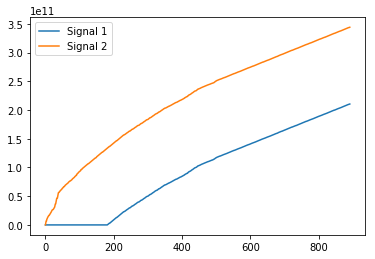

Signal shapes are (892,) and (892,)


In [3]:
def compare_signals(signal_1, signal_2):
    plt.plot(signal_1, label='Signal 1')
    plt.plot(signal_2, label='Signal 2')
    plt.legend()
    plt.show()

i = 1
compare_signals(est_signals[i], opt_signals[i])
print(f'Signal shapes are {est_signals[i].shape} and {opt_signals[i].shape}')

## Evaluate Trajectories

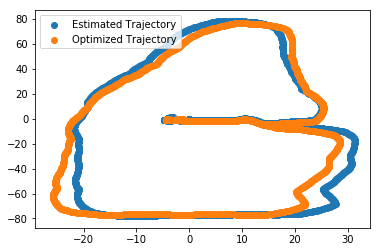

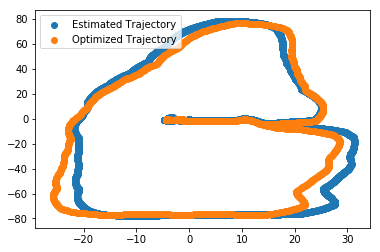

Synced signal shapes are (1611, 8) and (1611, 8)
Raw est shape is (15829, 8)


In [6]:
def compare_trajectories(est_traj, opt_traj):    
    plt.scatter(est_traj[:,1], est_traj[:,2], label='Estimated Trajectory')
    plt.scatter(opt_traj[:,1], opt_traj[:,2], label='Optimized Trajectory')
    plt.legend()
    plt.show()
    
def compare_trajectories_with_raw(est_raw_traj, opt_traj):    
    plt.scatter(est_raw_traj[:,1], est_raw_traj[:,2], label='Estimated Trajectory')
#     plt.scatter(opt_traj[:,1], opt_traj[:,2], label='Optimized Trajectory')
    plt.legend()
    plt.show()
    
i = 0
compare_trajectories(est_trajectory[i], opt_trajectory[i])
compare_trajectories(est_raw_trajectory[i], opt_trajectory[i])
print(f'Synced signal shapes are {est_trajectory[i].shape} and {opt_trajectory[i].shape}')
print(f'Raw est shape is {est_raw_trajectory[i].shape}')

## Evaluate Graph

(<Figure size 720x360 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f2064b7d438>)

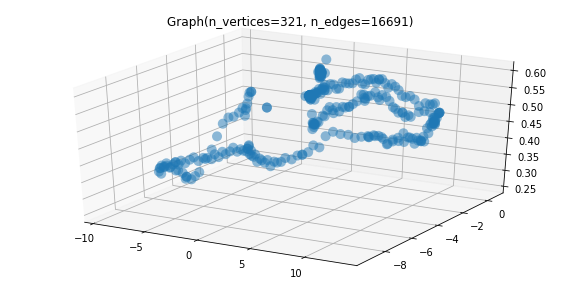

In [106]:
graph_per_dataset = []
for i in range(0, n_datasets):
    G = graphs.Graph(opt_graph_adj[i])
    G.set_coordinates(opt_graph_coords[i])
    G.compute_fourier_basis()
    graph_per_dataset.append(G)

graph_per_dataset[4].plot()

shape of coords (1709, 3)


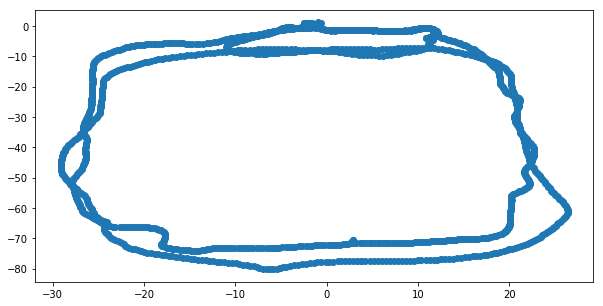

In [115]:
i=2
plt.scatter(opt_graph_coords[i][:,0], opt_graph_coords[i][:,1])
print(f'shape of coords {opt_graph_coords[i].shape}')